## Importing the required libraries

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing the datasets

In [58]:
Statewise_df=pd.read_csv('StatewiseTestingDetails.csv')
COVID_df=pd.read_csv('covid_19_india.csv')

## EDA for StatewiseTestingDetails

In [59]:
Statewise_df.dtypes

Date             object
State            object
TotalSamples    float64
Negative         object
Positive        float64
dtype: object

In [60]:
Statewise_df['Date']=pd.to_datetime(Statewise_df['Date'],dayfirst=True)

In [61]:
Statewise_df['Date'].dtypes

dtype('<M8[ns]')

In [62]:
Statewise_df.head()

,Date,State,TotalSamples,Negative,Positive
0,2020-04-17,Andaman and Nicobar Islands,1403.0,1210,12.0
1,2020-04-24,Andaman and Nicobar Islands,2679.0,NaN,27.0
2,2020-04-27,Andaman and Nicobar Islands,2848.0,NaN,33.0
3,2020-05-01,Andaman and Nicobar Islands,3754.0,NaN,33.0
4,2020-05-16,Andaman and Nicobar Islands,6677.0,NaN,33.0


In [63]:
Statewise_copy=Statewise_df.copy()

In [64]:
Statewise_copy['Date'].dtypes

dtype('<M8[ns]')

In [65]:
Statewise_copy.sort_values(by='Date',axis=0,ascending=True,inplace=True)

In [66]:
Statewise_copy.head()

,Date,State,TotalSamples,Negative,Positive
1503,2020-04-01,Delhi,2621.0,NaN,NaN
3107,2020-04-01,Kerala,7965.0,7256,265.0
6451,2020-04-01,West Bengal,659.0,568,37.0
939,2020-04-02,Chandigarh,124.0,98,18.0
556,2020-04-02,Assam,962.0,819,16.0


In [67]:
Statewise_copy.tail()

,Date,State,TotalSamples,Negative,Positive
5860,2020-10-27,Telangana,4115516.0,NaN,NaN
938,2020-10-27,Bihar,10358361.0,NaN,NaN
6044,2020-10-27,Tripura,449911.0,419621,30290.0
2706,2020-10-27,Jammu and Kashmir,2214645.0,2121968,NaN
4547,2020-10-27,Nagaland,95968.0,NaN,NaN


In [68]:
Statewise_copy.isna().sum()

Date               0
State              0
TotalSamples       0
Negative        2919
Positive        1995
dtype: int64

In [69]:
print(Statewise_copy[Statewise_copy['Negative'].notna()].isna().sum()['Positive'])
print(Statewise_copy[Statewise_copy['Positive'].notna()].isna().sum()['Negative'])

806
1730


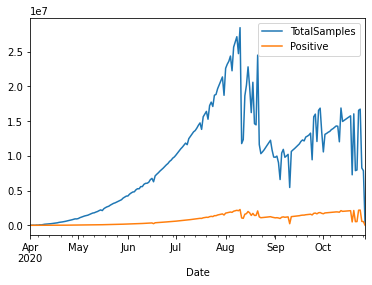

In [70]:
Statewise_copy[['Date','TotalSamples','Positive']].dropna().groupby(by='Date',axis=0,sort=True).sum().plot()

With time the sampling by the government has increased drastically(exponentially)

In [71]:
Statewise_copy[['State','Positive','TotalSamples']].groupby(by=['State'],axis=0).sum().sort_values(by='TotalSamples',ascending=False)[:12].index

Index(['Uttar Pradesh', 'Tamil Nadu', 'Maharashtra', 'Andhra Pradesh', 'Bihar',
       'Karnataka', 'Gujarat', 'Rajasthan', 'Assam', 'West Bengal', 'Delhi',
       'Odisha'],
      dtype='object', name='State')

In [72]:
Statewise_copy[['State','Positive']].groupby(by=['State'],axis=0).sum().sort_values(by='Positive',ascending=False)[:12].index

Index(['Maharashtra', 'Kerala', 'Tamil Nadu', 'Gujarat', 'Delhi', 'Karnataka',
       'Andhra Pradesh', 'Telangana', 'West Bengal', 'Jharkhand',
       'Uttar Pradesh', 'Haryana'],
      dtype='object', name='State')

In [73]:
state_group=Statewise_copy[['State','Positive','TotalSamples']].groupby(by=['State'],axis=0).sum()

In [74]:
state_group[:10]

,Positive,TotalSamples
State,,
Andaman and Nicobar Islands,283708.0,5233102.0
Andhra Pradesh,3859260.0,481591171.0
Arunachal Pradesh,51245.0,19149999.0
Assam,2065991.0,267750078.0
Bihar,1859345.0,464810399.0
Chandigarh,59195.0,5236720.0
Chhattisgarh,467857.0,87213024.0
Dadra and Nagar Haveli and Daman and Diu,169010.0,6324267.0
Delhi,6848173.0,246096283.0


In [75]:
state_group['Ratio']=state_group['Positive']/state_group['TotalSamples']

In [76]:
state_group.sort_values(by='Ratio',axis=0,ascending=False,inplace=True)

In [77]:
state_group.head()

,Positive,TotalSamples,Ratio
State,,,
Maharashtra,96901583.0,541688602.0,0.178888
Puducherry,1385219.0,13286653.0,0.104256
Kerala,13532289.0,222532121.0,0.060810
Andaman and Nicobar Islands,283708.0,5233102.0,0.054214
Tripura,1615229.0,33201371.0,0.048649


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

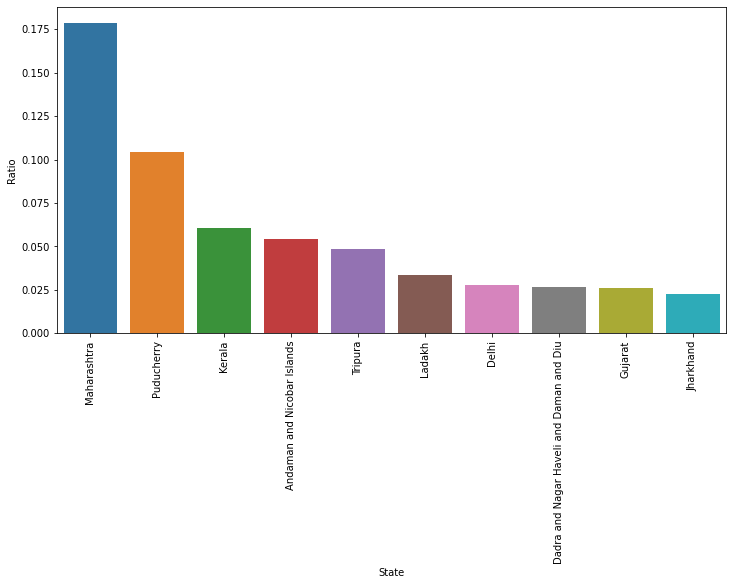

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(x=state_group[:10].index,y=state_group[:10].Ratio)
plt.xticks(rotation=90)





*   Highest positive cases to total number tested ratio is highest in Maharastra
*   Also highest number of positive cases are registered in Maharastra



## COVID-19 INDIA EDA

In [79]:
COVID_df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [80]:
COVID_df.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [81]:
COVID_df['Date']=pd.to_datetime(COVID_df['Date'],dayfirst=True)

In [82]:
COVID_df['Date'].dtypes

dtype('<M8[ns]')

In [83]:
COVID_copy=COVID_df.copy()

In [84]:
COVID_copy.dtypes

Sno                                  int64
Date                        datetime64[ns]
Time                                object
State/UnionTerritory                object
ConfirmedIndianNational             object
ConfirmedForeignNational            object
Cured                                int64
Deaths                               int64
Confirmed                            int64
dtype: object

In [85]:
COVID_copy.drop(columns='Time',inplace=True)
COVID_df.drop(columns='Time',inplace=True)

In [86]:
COVID_copy.loc[446:,['ConfirmedForeignNational']]=0

In [89]:
COVID_copy.loc[446:,['ConfirmedIndianNational']]=COVID_copy.iloc[446:,-1].values

In [96]:
COVID_copy['ConfirmedIndianNational']=COVID_copy['ConfirmedIndianNational'].astype('int')

In [99]:
COVID_copy['ConfirmedForeignNational']=COVID_copy['ConfirmedForeignNational'].astype('int')

In [101]:
COVID_copy.tail()

,Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
7781,7782,2020-10-27,Telengana,232671,0,213466,1315,232671
7782,7783,2020-10-27,Tripura,30293,0,28153,344,30293
7783,7784,2020-10-27,Uttarakhand,60744,0,55663,1001,60744
7784,7785,2020-10-27,Uttar Pradesh,472077,0,438521,6904,472077
7785,7786,2020-10-27,West Bengal,353822,0,310086,6546,353822


In [114]:
group_foreign=COVID_copy[['State/UnionTerritory','ConfirmedForeignNational']].groupby(by='State/UnionTerritory',axis=0).sum()

In [117]:
group_foreign.sort_values(by='ConfirmedForeignNational',ascending=False,inplace=True)

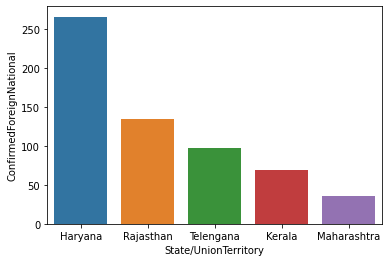

In [118]:
sns.barplot(x=group_foreign.index[:5],y=group_foreign['ConfirmedForeignNational'][:5])

Most of the foreign nationals being confirmed are from Haryana

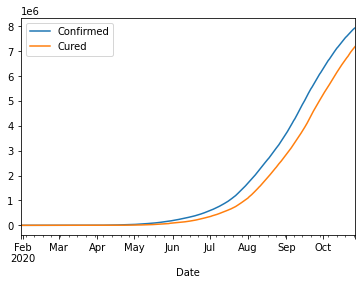

In [122]:
COVID_copy[['Date','Confirmed','Cured']].groupby(by='Date').sum().sort_values(by='Date').plot()

Text(0, 0.5, 'No of Deaths')

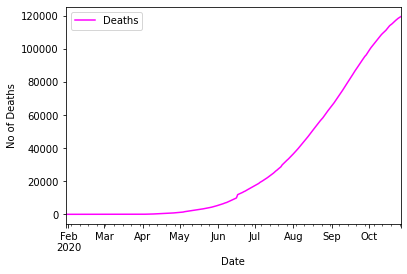

In [126]:
COVID_copy[['Date','Deaths']].groupby(by='Date').sum().sort_values(by='Date').plot(color='magenta')
plt.ylabel('No of Deaths')

In [129]:
COVID_copy['State/UnionTerritory'].replace(to_replace=['Telangana','Telangana***','Telengana***'],value='Telengana',inplace=True)

In [130]:
group_state=COVID_copy[['State/UnionTerritory','Cured','Deaths','Confirmed']].groupby(by='State/UnionTerritory').sum()

In [135]:
group_state['Confirmed'].sort_values(ascending=False)[:10]

State/UnionTerritory
Maharashtra       105538919
Tamil Nadu         50167412
Andhra Pradesh     48200952
Karnataka          42342521
Uttar Pradesh      28088092
Delhi              25301742
West Bengal        19567105
Telengana          14968676
Odisha             14164794
Bihar              14139595
Name: Confirmed, dtype: int64

In [136]:
group_state['Cured'].sort_values(ascending=False)[:10]

State/UnionTerritory
Maharashtra       78224180
Tamil Nadu        42796330
Andhra Pradesh    40409530
Karnataka         32201170
Uttar Pradesh     22563041
Delhi             21499809
West Bengal       16185659
Bihar             12246639
Telengana         12080025
Odisha            11773279
Name: Cured, dtype: int64

In [137]:
group_state['Deaths'].sort_values(ascending=False)[:10]

State/UnionTerritory
Maharashtra       3138377
Tamil Nadu         797359
Karnataka          649096
Delhi              590548
Uttar Pradesh      436558
Andhra Pradesh     420087
Gujarat            409257
West Bengal        403351
Punjab             213364
Madhya Pradesh     204437
Name: Deaths, dtype: int64